## 3. Feladatsor (numerikus deriválás & integrálás)

### Interpolációból származtatható formulák

**Ötlet:** közelítsük az $f$ függvényt egy $p$ interpolációs polinommal. Ezt könnyű deriválni és integrálni. Közelítsük a keresett integrál és derivált értéket az $\int p$ és $p'$ függvényekbe való helyettesítéssel.

**Példa:** Legyen a $0, h$ a két alappontunk, továbbá $y_0, y_h$ az ott felvett függvényértékünk. Ekkor az interpolációs polinom Newton-féle alakja
$$p(x) = y_0 + \frac{y_h - y_0}{h - 0}(x - 0),$$
melyből
$$ p'(x) = \frac{y_h - y_0}{h} $$
illetve
$$\int p(x) = y_0 x + \frac{y_h - y_0}{2h}x^2,$$
így

$$ f'(0) \approx p'(0) =  \frac{y_h - y_0}{h} = \frac{f(h) - f(0)}{h} $$
és
$$ \int\limits_0^h f \approx \int\limits_0^h p = \left( \int p \right)(h) - \left( \int p \right)(0) = y_0 h + \frac{y_h - y_0}{2}h - 0 = \frac{y_0 + y_h}{2}h.$$

#### 1. Feladat

Legyenek most az alappontok $-h, 0, h$. Írjuk fel az interpolációs polinom Newton-féle alakját és ennek segítségével adjunk közelítést a $f'(0)$ illetve az $\int_{-h}^{h} f$ értékekre.

**Mo.** 
Az interpolációs polinom alakja
$$ p(x) = y_{-h} + \frac{y_{0} - y_{-h}}{0 - (-h)} (x-(-h)) + \frac{y_h - 2y_{0} + y_{-h}}{2(h - 0)(h - (-h))}(x-(-h))(x-0),
$$
azaz
$$
p(x) = y_{-h} + \frac{y_{0} - y_{-h}}{h} (x+h) + \frac{y_h - 2y_{0} + y_{-h}}{2h^2}(x+h)(x). 
$$

Ekkor
$$
p'(x) = \frac{y_{0} - y_{-h}}{h} + \frac{y_h - 2y_{0} + y_{-h}}{2h^2}(2x+h),
$$
így
$$
p'(0) = \frac{y_{0} - y_{-h}}{h} + \frac{y_h - 2y_{0} + y_{-h}}{2h} = \frac{y_h - y_{-h}}{2h},
$$
ami a szokásos centrális másodrendű differenciacsillag.

Másrészt, ha $P' = p$, akkor
$$
P(x) = x y_{-h} + \frac{y_{0} - y_{-h}}{h} x(x/2+h) + \frac{y_h - 2y_{0} + y_{-h}}{2h^2}(x/3+h/2)(x^2).
$$
Így
$$P(h) = h y_{-h} + \frac{y_{0} - y_{-h}}{h} h(h/2+h) + \frac{y_h - 2y_{0} + y_{-h}}{2h^2}(h/3+h/2)(h^2)$$
és
$$P(-h) = -h y_{-h} + \frac{y_{0} - y_{-h}}{h} (-h)(-h/2+h) + \frac{y_h - 2y_{0} + y_{-h}}{2h^2}(-h/3+h/2)(h^2)$$, tehát
$$P(h) - P(-h) = 2h\left(
y_{-h} + (y_{0} - y_{-h})(3/2 + 1/2)/2 + \frac14 (y_h - 2y_{0} + y_{-h})(1/3 + 1/2 - (1/2 - 1/3))
\right),$$
vagyis
$$
\int_{-h}^h p = 2h \left(
y_{-h} + y_{0} - y_{-h} + \frac14 (y_h - 2y_{0} + y_{-h})(4/6)\right)
= 2h\frac16\left(y_{-h} + 4 y_0 + y_h\right),
$$
ami nem más, mint a Simpson-formula.

**Megjegyzés**

Az interpolációs-megközelítésből természetes módon adódik hibabecslés is az integrált, illetve a deriváltat közelítő formulákra.

------------

### Kvadratúrák

**Ötlet:**
Adott $f: [0,1] \to \mathbb{R}$ függvény, $0 \leq c_j \leq 1$ alappontok és $b_j \in \mathbb{R}$ súlyok mellett tekintsük az alábbi közelítést: $$\int_0^1 f \approx \sum\limits_{j=1}^s b_j f(c_j). $$

**Rend:** Egy ilyen kvadratúrát $p$-edrendűnek nevezünk, ha pontosan integrálja a legfeljebb $(p-1)$-edfokú polinomokat, de a $p$-edfokúakat már nem.

**Rendfeltételek:**
Egy $p$-edrendű kvadratúra pontosan kell, hogy integrálja az $1, x, x^2, \ldots, x^{p-1}$ monomokat. Fordítva, ha egy kvadratúra ezeket pontosan integrálja, akkor ezek lineáris kombinációit is (hiszen az integrálás lineáris), tehát minden legfeljebb $(p-1)$-edfokú polinomot, tehát legalább $p$-edrendű.

Behelyettesítve, ez azt jelenti, hogy az alábbi feltételeknek kell teljesülnie a (legalább) p-edrendűséghez:
$$
  \sum\limits_{j=1}^s b_j (c_j)^{\color{red} q-1} = \int_0^1 x^{q-1} \, dx = \frac{1}{q}. \qquad (q=1\ldots p)
$$

Nevezetesen, ha olyan "kvadratúrát" látunk, mely a konstansokat sem integrálja jól, azaz melyre
$\sum b_j \neq 1$, akkor meneküljünk.

#### 2. Feladat
Írjunk programot, ami kiszámolja egy adott kvadratúra rendjét. Próbáljuk is ki néhány ismert formulán (pl. Simpson-szabály).

In [186]:
using Base.Iterators

function kvadratura_rend(bs,cs)
    # bs: súlyok
    # cs: alappontok ([0,1]-ből)

    s = length(bs)
    # max rend = 2s, elég addig nézni
    cond_errs = cs' .^ (0:(2*s-1)) * bs .- 1 ./ (1:(2*s))
    return sum(map(x->1, takewhile(x -> abs(x) <= 1e-14, cond_errs)))
end

kvadratura_rend (generic function with 1 method)

In [187]:
kvadratura_rend([1], [1])

1

In [188]:
kvadratura_rend([1],[1/2])

2

In [189]:
kvadratura_rend([1,4,1]./6,[0, 1/2, 1])

4

**Megjegyzés:** Nagy rendet az alappontok és súlyok jó megválasztásával érhetünk el, a maximális rendet a Gauss-féle kvadratúrák tudják. Ezek rendje $2s$. Az alappontok bizonyos ortogonális polinomok gyökei lesznek.

#### 3. Feladat

Legyen $s=1$. Adjuk meg kézzel a másodrendű (Gauss-féle) kvadratúrát megadó $b_1, c_1$ értékeket. Milyen polinomokat fog ez pontosan integrálni?

In [5]:
# az elso 2 rendfeltetel:
#
# b_1 = 1
# c_1 b_1 = 1/2
#
# tehat b_1 = 1, c_1 = 1/2

#### 4. Feladat
Legyen $s=2$. Tegyük fel, hogy tudjuk, hogy $b_1 = b_2$. Mely $b_1, b_2, c_1, c_2$ értékekkel kapjuk meg a negyedrendű (Gauss-féle) kvadratúrát?

In [190]:
# az elso 4 rendfeltetel:
#
# b_1 + b_2 = 2b = 1          -> b = 1/2
#
# (c_1 + c_2)/2 = 1/2         -> c_1 = c, c_2 = 1-c
# (c^2 + (1-c)^2)/2 = 1/3
# (c^3 + (1-c)^3)/2 = 1/4

# a 3. rendfeltetelbol
#
# 2c^2 - 2c + 1/3 = 0
# c_12 = (2 +- sqrt(4 - 8/3))/4 = 1/2 +- 1/2 * sqrt(1/3)
#
# szoval
# c_1 = c   = 1/2 + 1/2 * sqrt(1/3)
# c_2 = 1-c = 1/2 - 1/2 * sqrt(1/3)

# Mj: azert nem hasznaltuk a 4. rendfeltetelt, mert tudtuk, hogy b_1 = b_2.
#     szerencsere ez jo feltetelezes volt
kvadratura_rend([1/2, 1/2], [1/2 - 1/2 * sqrt(1/3), 1/2 + 1/2 * sqrt(1/3)])

4

#### 5. Feladat
Mutassunk egy olyan polinomot, melyet az előző feladat kvadratúrája pontosan integrál, azonban a Simpson-szabály nem! $\text{\color{red} Ha nincs ilyen, indokoljuk meg, hogy miért nincs!}$

In [191]:
function kvadratura01(bs, cs, f)
    return sum(bs .* f.(cs))
end

simpson(f) = kvadratura01([1/6, 4/6, 1/6], [0, 1/2, 1], f)
simpson(x -> x^3)

0.25

In [192]:
gauss2(f)  = kvadratura01([1/2, 1/2], [1/2 - 1/2 * sqrt(1/3), 1/2 + 1/2 * sqrt(1/3)], f)
gauss2(x -> x^3)

0.25

In [193]:
# mindket kvadratura pontosan integralja a legfeljebb 3-adfokú polinomokat
kvadratura_rend([1,4,1]./6,[0, 1/2, 1])

4

In [194]:
# x^4-t meg mar egyik sem:

In [195]:
simpson(x -> x^4)

0.20833333333333331

In [196]:
gauss2(x -> x^4)

0.19444444444444445

**Ötlet:** Az alappontjainkat választhatjuk akár véletlenszerűen is.

Ismeretes, hogy ha $X$ egy valószínűségi változó, mely $\rho$ sűrűségfüggvénye a $[0,1]$-re koncentrált, akkor adott mérhető $f$ függvény mellett
$$
\mathbb{E}[f(X)] = \int\limits_0^1 f(x) \rho (x) \, dx.
$$
Látható, hogy ha $\rho = \chi_{[0,1]}$, azaz a $[0,1]$ intervallum indikátorfüggvénye, akkor 
$$
\mathbb{E}[f(X)] = \int\limits_0^1 f(x) \, dx.
$$
Hogyan tudnánk a baloldalon álló kifejezést közelíteni? A nagy számok gyenge törvényével, természetesen!

Sorsoljunk tehát a $[0,1]$-en egyenletes eloszlásból $\xi_j$ értékeket, helyettesítsük ezeket be és vegyük a kapott értékek átlagát:
$$
 \mathbb{E}[f(X)] \approx \frac{1}{N} \sum\limits_{j=1}^N f(\xi_j).
$$


#### 6. Feladat

Írjunk programot, ami ezzel a megközelítéssel dolgozva határozza meg egy $[0,1]$ intervallumon vett intergál közelítő-értékét. Próbáljuk is ki ezt, például az $x^4$ függvényre. Ábrázoljuk hibákat log-log ábrán és fogalmazzunk meg sejtést arról, hogy kb. hányszorosára változik a hiba, ha a sorsolt pontok számát megtízszerezzük.

In [197]:
function mc_int(f, N)
    xs = rand(Float64, (1,N))
    return sum(f.(xs))/N
end

mc_int (generic function with 1 method)

In [198]:
mc_int(x->x^4, 10^2) - 1/5

-0.030144926038898345

In [199]:
mc_int(x->x^4, 10^4) - 1/5

0.0011103944413625166

In [200]:
mc_int(x->x^4, 10^6) - 1/5

0.00019648094016458395

In [201]:
# végezzünk minden N-re 20 mérést és vegyük a hibák átlagát

Ns = 10 .^(3:8)

Nss = ones(20)' .* Ns

6×20 Matrix{Float64}:
   1000.0      1000.0      1000.0    …    1000.0      1000.0      1000.0
  10000.0     10000.0     10000.0        10000.0     10000.0     10000.0
 100000.0    100000.0    100000.0       100000.0    100000.0    100000.0
      1.0e6       1.0e6       1.0e6          1.0e6       1.0e6       1.0e6
      1.0e7       1.0e7       1.0e7          1.0e7       1.0e7       1.0e7
      1.0e8       1.0e8       1.0e8  …       1.0e8       1.0e8       1.0e8

In [202]:
mc_int_x4(N) = mc_int(x -> x^4, Int64(N))

mc_int_x4 (generic function with 1 method)

In [203]:
# lehetne ezt hatékonyabban is :)
errs = abs.(mc_int_x4.(Nss) .- 1/5)

6×20 Matrix{Float64}:
 0.0118717    0.00663888   0.003304     …  0.0116865    0.00895625
 0.000975249  0.00200616   0.000859446     0.00406172   5.2876e-5
 0.000460977  0.00035827   0.000137239     6.97931e-5   0.00122221
 0.000251808  0.000296761  7.53856e-5      4.17304e-5   5.95749e-5
 0.000156436  6.91524e-5   4.23136e-5      0.000236395  3.58685e-5
 6.22212e-5   4.41354e-6   6.05543e-5   …  2.28095e-5   3.28306e-5

In [204]:
avg_errs = (sum(errs, dims=2)/20)[1:end, 1]

6-element Vector{Float64}:
 0.008643531296260306
 0.0019936545794312114
 0.0005859038504953063
 0.0001864839702313617
 8.33797080810994e-5
 2.1073795879839043e-5

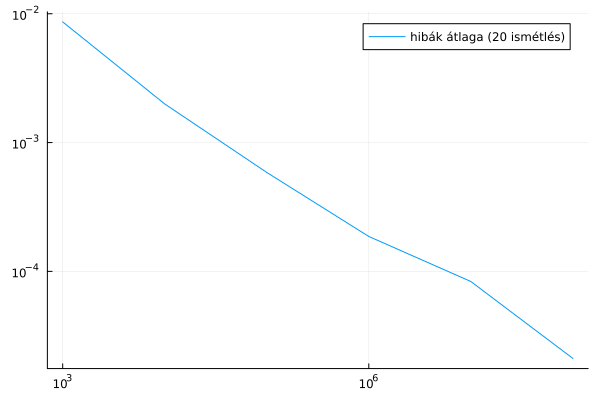

In [205]:
using Plots
plot(Ns, avg_errs, xaxis=:log, yaxis=:log, label="hibák átlaga (20 ismétlés)", )

Mekkora ennek az "egyenesnek" a meredeksége? Illesszünk rá elsőfokú polinomot.

In [206]:
using Polynomials

In [207]:
p = Polynomials.fit(log10.(Ns), log10.(avg_errs), 1)

Polynomial(-0.6323315162226169 - 0.5056484479054952*x)

Tehát, ez alapján, ha tízszeresére növeljük az N-net, akkor azt várhatjuk, hogy kb. $10^{-0.52}$-szörösére változik a hiba. Kicsit másként:

In [208]:
10^(-0.52)

0.3019951720402016

In [209]:
sum(avg_errs[2:end] ./ avg_errs[1:(end-1)])/length(avg_errs[2:end])

0.30853617747690143

----------------

### Hibabecslés és adaptivitás

Tegyük fel, hogy közelíteni szeretnénk egy $x$, sokszor folyt. diff.ható függvény értékét a $0$ körül. Vegyük egy $p$-edrendű $y$ közelítést és egy $h > 0$ kis valós számot. Ekkor próbáljuk megbecsülni az 
$$
e(h) = x(h) - y(h) = C h^{p+1} + \mathcal{O}(h^{p+2})
$$

hibát, melyet feltételezéseink szerint jól jellemez a $C$ konstans.

Egy lehetséges megközelítés, hogy vegyünk egy $z$ közelítést, mely legyen $p+1$-edrendű. Ekkor
$$
x(h) - z(h) = \tilde C h^{p+2} + \mathcal{O}(h^{p+3}).
$$

Tekintsük $z$-t pontos megoldásnak, és közelítsük a tényleges hiba értékét ennek segítségével, pontosabban:
$$
 e(h) \approx y(h) - z(h) = y(h) - x(h) + x(h) - z(h) = -C h^{p+1} + \mathcal{O}(h^{p+2}).
$$


Nekünk az $y$ és $z$ természetesen egy-egy kvadratúra lesz.

#### 7. Feladat

Írjunk programot, mely egy $p$-edrendű kvadratúrával megközelíti egy függvénynek a $[0,h]$ intervallumon vett integrálját és egy $(p+1)$-edrendű kvadratúrából hibabecslést is ad nekünk erre, például $p=1$ esetén.

In [210]:
function egyszeru_kvadratura_es_hibabecsles(f, h)
    int_approx = f(0)*h
    err_approx = f(h/2)*h - int_approx
    return int_approx, err_approx
end

egyszeru_kvadratura_es_hibabecsles (generic function with 2 methods)

In [211]:
#érték & hibabecslés is stimmel
egyszeru_kvadratura_es_hibabecsles(x->2, 1)

(2, 0)

In [212]:
# érték nem, de hibabecslés stimmel
egyszeru_kvadratura_es_hibabecsles(x->x+2, 1)

(2, 0.5)

In [213]:
#érték sem meg a hibabecslés sem stimmel
egyszeru_kvadratura_es_hibabecsles(x->x^2, 1)

(0, 0.25)

Ha hibabecsléssel már rendelkezünk, akkor egy egyszerű adaptív algoritmus a következő.

Osszuk fel az intervallumot $h$ hosszú részintervallumokra. Számoljuk ki a függvényünk intergráljának közelítését (hibabecsléssel együtt) az egyes részintervallumokon. Ha valamelyik részintervallumon a hiba túl nagynak bizonyul, akkor osszuk fel azt az intervallumot két feleakkora részre és ismételjük meg az integrálást ezeken. "És így tovább."

#### 8. Feladat (*)
Implementáljuk a fenti algoritmust.

In [214]:
# lehet ez is szorgalmi
function adaptint_recursive(f, quadrature, TOL, a, b)
    # quadrature :: (f, a, b) -> (integral, hiba)
    # f :: az integrálandó függvény
    # TOL :: tolerancia
    _int, _err = quadrature(f, a, b)
    if abs(_err) <= TOL
        return _int
    end

    return (adaptint_recursive(f, quadrature, TOL, a,            a + (b-a)/2) + 
            adaptint_recursive(f, quadrature, TOL, a + (b-a)/2, b))
end

adaptint_recursive (generic function with 1 method)

In [220]:
function egyszeru_kvadratura_es_hibabecsles_ab(f, a, b)
    # az a kod a [0,h]-ra szolt, nekunk meg [a, b] intervallumunk van
    return egyszeru_kvadratura_es_hibabecsles(x -> f(x + a), b-a)
end

egyszeru_kvadratura_es_hibabecsles_ab (generic function with 1 method)

In [216]:
# probaljuk meg, hatha sikeresen kiintegraljuk azt, amit az elozo feladatban nem tudtunk
# (de amihez volt jo hibabecslesunk)

adaptint_recursive(x -> x+2, egyszeru_kvadratura_es_hibabecsles_ab, 1e-4, 0, 1)

2.49609375

In [217]:
adaptint_recursive(x -> x+2, egyszeru_kvadratura_es_hibabecsles_ab, 1e-8, 0, 1)

2.49993896484375

In [218]:
# juhe :)